
<p><img alt="udeA logo" height="120px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="10px" vspace="0px" style="width:107px;height:152px;"></p>

# <center> <font color='0B5345'>Homework 3.3:</font> <br> PageRank </center>

## TASK: T1

###  I. sign in with grader

In [3]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
init.course_id = "bigdata.v1"
import inspect
from local.lib.rlxmoocapi import session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L03.03", varname="student");

<IPython.core.display.Javascript object>

### II. Add your solution 

<p>To read documentation about the package <em>networkx</em>, yo can see the network analysis in Python <a href="https://networkx.org/documentation/stable/tutorial.html"> Click</a> </p>

In [15]:
def my_solution(name):
  import matplotlib.pyplot as plt
  import networkx as nx
  import numpy as np
  import pandas as pd


  class WebMatrix:
      """
      This class build a Web Matrix from the Web graph. 
      It estimates the probability to go from the source node to the destination node trough the link between them
      """
      def __init__(self,name): 
          self._G        = nx.DiGraph()                                            # create an empty graph.
          self._n        = 0                                                       # number of nodes.
          self._edges    = 0                                                       # number of edges. 
          self._my_dict  = {}                                                      # empty dictionary to assign an unique idx per page.
          self._dfMatrix = pd.DataFrame(columns=['src','dest','probability'])      # Dataframe to store the Matrix M as a sparse Matrix
          self._DeadEdges = pd.DataFrame(columns=['src','dest','probability'])     # It contains Dead Edges that will be deleted by the DropDeadEnd method.
          self._DeadEnds = []                                                      # the list contains the DeadEnd nodes used by the method find_DegreeOfNodes.     
          return 

      def add_nodes_(self,nodes):                                                  # nodes is a list storing the graph nodes.
          self._G.add_nodes_from(nodes)
          self._n = self._G.number_of_nodes()
          return self._n

      def add_edges_(self,edges):                                                 # edges is a list storing tuples like ("page-x","page-y")
          self._G.add_edges_from(edges)
          self._edges =  self._G.number_of_edges()
          return self._edges

      def find_DegreeOfNodes_(self):
          DeadEnds = []                                                         # the list contains the DeadEnd nodes
          degrees = np.zeros(len(list(self._G.nodes())))                            
          nodes = list(self._G.nodes())
          for i in  range (len(nodes)):
              degrees[i] = len(list(self._G.out_edges(nodes[i])))
              if degrees[i] == 0 :
                DeadEnds.append(list(self._G.nodes())[i])                        # add new DeadEnd node.
          return degrees, DeadEnds   

      def build_matrix_(self, degrees):
          edges = list(self._G.edges())                                           # this list stores all Web edges 
          nodes = list(self._G.nodes())
          self._dfMatrix = pd.DataFrame(columns=['src','dest','probability'])     # create dataframe to store sparse Web matrix
          self._my_dict = {}                                                      # dictionary to store each Web page asociated with an id.

          for i in range(len(nodes)):
              self._my_dict[nodes[i]] = i                                         # assign id i to each Web page
          for item in range(len(edges)):
              if degrees[self._my_dict[edges[item][0]]]  != 0 :                                     
                dest = edges[item][1]                                            # destination Web page in the edge
                src  = edges[item][0]                                            # source Web page in th edge
                self._G[src][dest]['prob'] =  (1 / degrees[self._my_dict[edges[item][0]]])      # compute probability to select "dest" from "src"
                self._dfMatrix = self._dfMatrix.append({'src':src, 'dest':dest, 'probability': (1 / degrees[self._my_dict[edges[item][0]]])}, ignore_index= True)                                    
          return self._dfMatrix

      def view_(self):                                                            # plot the Web Graph
          nx.draw(self._G, with_labels=True, font_color='blue', node_color="yellow", edgecolors="blue", font_size=8,  node_size= 900, font_weight="bold")
          return

      def DropDeadEnds(self):
        """
        Delete nodes  with pages that have no out-links to other pages. 
        Besides it updates the probability between nodes when they have out edges toward the Dead Ends. 
        """
        ### START YOUR CODE HERE
        self._FullDeadEdges = pd.DataFrame(columns=['src','dest','probability'])
        degrees = self.find_DegreeOfNodes_()

        while len(self._DeadEnds) != 0:
           nodes = list(self._G.Nodes())
           self._FullDeadEnd.append(nodes[self._my_dict[self._DeadEnds[0]]])
           self._FullDeadEdges = self._FullDeadEdges.append(self._dfMatrix[self._dfMatrix['dest'] == nodes[self._my_dict[self._DeadEnds[0]]]])
           self._G.remove_node(nodes[self._my_dict[self._DeadEnds[0]]])
           degrees=self.find_DegreeOfNodes_()

           self._n = self._G.number_of_nodes()
           self._edges=self._G.number_of_edges()
           df=self.build_matrix_(degrees)

        #### END YOUR CODE HERE
        return Web._dfMatrix , Web._DeadEnds                        

      def Taxation_(self, Beta):
        #### START YOUR CODE HERE
        df_V=pd.DataFrame(columns=['dest','value'])
        for key in self._my_dict:
          df_V = df_V.append({'dest':key , 'value':1/self._n},ignore_index=True)
        
        e_n = (1-Beta)*1/self._n
        df_V = pd_merge(self._dfMatrix[['dest','probability']],df_V,how="inner",on="dest")
        df_V['value'] = Beta*df_V['probability']*df_V['value']
        df_V=df_V[['dest','value']]
        df_V=df_V.groupby('dest').sum()
        df_V['value']=df_V['value']+e_n
        df_V_previous=df_V['value']
        isStationary=False
        while isStationary==False:
          df_V = pd.merge(self._dfMatrix[['dest','probability']],df_V,how="inner",left_on="src",rigth_on="dest")
          df_V['value']=Beta*df_V['probability']*df_V['value']
          df_V = df_V.groupby('dest').sum()
          df_V['value']=df_V['value']+e_n
          isStationary = np.abs(df_V['value']-df_V_previous).sum() <= 0.001
          df_V_previous = df_V['value']

        df_V=df_V.reset_index()
        self._PageRankVector = df_V['value']
        self._PageRankVector = self._PageRankVector.rename(columns={'dest' : 'node'})
      
        #### END YOUR CODE HERE
        return self._PageRankVector                                        # is is a dataframe with columns ['node' , 'value']

      def PageRank_(self):
        #### START YOUR CODE HERE
        self._PageRankVector=self._PageRankVector(columns={'node':'dest'})
        for page in reversed(self._FullDeadEnds):
          if page not in self._PageRankVector.values:
            edges = pd.merge(self._FullDeadEdges[self._FullDeadEdges['dest']==page],self._PageRankVector,how="inner",left_on='src',right_on="dest")
            self._PageRankVector=self._PageRankVector.append({'dest': page,'value' : (edges['probability']*edges['value']).sum()},ignore_index=True)


        self._PageRankVector = self._PageRankVector.sort_values(by=['dest'],ascending=True)
        self._PageRankVector = self._PageRankVector.rename(columns = {'dest':'node'})

        #### END YOUR CODE HERE
        return self._PageRankVector  
                                                                           # it  stores the PageRank for every Web page and columns ['node' , 'value']
  return WebMatrix(name)

<font color='0B5345' ><b>Step 1:</b></font> Write the procedure *DropDeadEnds*.  <br><em>Input:</em> the Matrix $M$. <br> <em>Output: </em>self._dfMatrix contains no DeadEnds nodes whereas  self._FullDeads contains DeadEnds nodes


<img src="https://github.com/freddyduitama/images/blob/master/web-4.png?raw=true"  align="left" height="180" width="400">

\begin{align*}
M =
\left[
    \begin{array}{cccc}
     0 & 1/3 & 1/3 & 1/3 & 0 \\
    1/2 & 0 & 0 & 1/2 & 0 \\
    0 & 0 & 0 & 0 & 1\\
    0 & 1/2 & 1/2 & 0  & 0\\
    0 & 0 & 0 & 0  & 0\\
    \end{array}
  \right] 
\end{align*}
<br><br>
<caption><font color='0B5345'> <b>&emsp;&emsp;&emsp;&emsp; <u> Figure 1-a:</u>  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <u>Figure 1-b:</u></b> &emsp;&emsp;&emsp;&emsp;<br> &emsp;&emsp; G: graph with dead ends &emsp;&emsp; G': dropping dead ends.</font>&emsp;&emsp;  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;</caption> 



In [ ]:
# add this method to tha class WebMatrix
def DropDeadEnds(Web):                                                 # parameter: A WebMatrix object.
  """
  Delete nodes  with pages that have no out-links to other pages.
  Besides it updates the probability between nodes when they have out edges toward the Dead Ends. 
  INPUT:  
  """
  degree=Web.find_DegreeOfNodes_()
  while len(Web._DeadEnds) != 0 :
    nodes = list(Web._G.nodes())
        #### START YOUR CODE HERE
        


        #### END YOUR CODE HERE
    return self._dfMatrix, self._FullDeadEnds                            # self._dfMatrix contains no DeadEnds nodes, self._FullDeads contains DeadEnds nodes

<font color='0B5345' ><b>Step 2:</b></font> Write the procedure called <em>Taxation.</em>
$\vec v_{i+1} = \beta M' \vec v_i' + (1 - \beta ) \frac {\vec e'}{n} \tag{1}$

<a>Hint:</a> 
<font size="2">
<ul align="justify">
<li>You can use Pandas DataFrames to represent both the sparse Web matrix and the vector. See Fig. $2$.</li>
<li>You can use the join operation df_P = pd.merge(df_M, df_N, on=<font color="green">"j"</font>, how=<font color="green">"inner"</font>). </li>
<li>You can use the following sentence: df_P = df_P.groupby(<font color="green">'i'</font>).sum()</li>
</ul>
<center><img src="https://github.com/freddyduitama/images/blob/master/page-rank1.png?raw=true"  height="200" width="520"></center>
<caption><center><font color='0B5345'> <u> <b>Figure 2:</b><br> </u>Matrix as Pandas DataFrame.</font></center></caption>   

In [ ]:
# add this method to class WebMatrix
def Taxation_(self, Beta):
       #### START YOUR CODE HERE



        ## END YOUR CODE HERE
    return self._PageRankVector                                         # dataframe with columns ['node' , 'value']

<font color='0B5345' ><b>Step 3:</b></font> Write the procedure  for computing the PageRank to pages that have been dropped in step 1, do it in the order opposite to that in which they were deleted.

<center><img src="https://github.com/freddyduitama/images/blob/master/web-5.png?raw=true"  height="200" width="220"></center><br>
<caption><center><font color='0B5345'> <u> <b>Figure 3:</b><br> </u>Calculing pageRank for Dead ends.</font></center></caption>    

In [ ]:
# add this method to class WebMatrix
def PageRank_():
        #### START YOUR CODE HERE



        ## END YOUR CODE HERE
    return  self._PageRankVector

### III. Test your solution:  <b>Case 1</b>

In [11]:
# This code build the graph and the Web Matrix
Web = my_solution("Web")                                                #create the object WebMatrix
nodes = ["page-1","page-2","page-3","page-4"]       
Nnodes = Web.add_nodes_(nodes)                
Nedges = Web.add_edges_([("page-1","page-2"), ("page-1","page-3"),("page-1","page-4"), ("page-2","page-1"),("page-2","page-4"),("page-3","page-1"),("page-4","page-2"),("page-4","page-3")])
degree, DeadEnds = Web.find_DegreeOfNodes_()
df=Web.build_matrix_(degree)                         

print("Number of Nodes ", Nnodes)
print("Number of Edges ", Nedges)
print("degree per page ", Web.find_DegreeOfNodes_())
print("          Web Matrix ")
df

Number of Nodes  4
Number of Edges  8
degree per page  (array([3., 2., 1., 2.]), [])
          Web Matrix 


,src,dest,probability
0,page-1,page-2,0.333333
1,page-1,page-3,0.333333
2,page-1,page-4,0.333333
3,page-2,page-1,0.500000
4,page-2,page-4,0.500000
5,page-3,page-1,1.000000
6,page-4,page-2,0.500000
7,page-4,page-3,0.500000


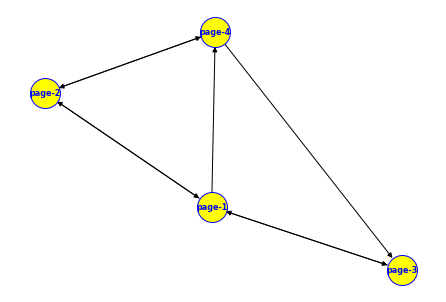

In [12]:
Web.view_()

In [ ]:
print(Web.DropDeadEnds())

(        index    dest  probability
src                               
page-1      0  page-2     0.333333
page-1      1  page-3     0.333333
page-1      2  page-4     0.333333
page-2      3  page-1     0.500000
page-2      4  page-4     0.500000
page-3      5  page-1     1.000000
page-4      6  page-2     0.500000
page-4      7  page-3     0.500000, [])


In [ ]:
Web.Taxation_(0.8)

,node,value
0,page-1,0.321546
1,page-2,0.226151
2,page-3,0.226151
3,page-4,0.226151


In [ ]:
Web.PageRank_()

,node,value
0,page-1,0.321546
1,page-2,0.226151
2,page-3,0.226151
3,page-4,0.226151


Answer  Case 1

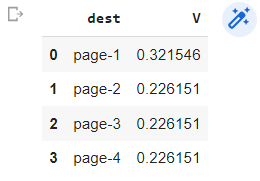



### IV. Test your solution: <b> Case 2</b>


In [ ]:
# This code build the graph and the Web Matrix
Web = my_solution("Web")                                                         #create the object WebMatrix
nodes = ["page-1","page-2","page-3","page-4","page-5"]       
Nnodes = Web.add_nodes_(nodes)                
Nedges = Web.add_edges_([("page-1","page-2"), ("page-1","page-3"),("page-1","page-4"), ("page-2","page-1"),("page-2","page-4"),("page-3","page-5"),("page-4","page-2"),("page-4","page-3")])
degree, DeadEnds = Web.find_DegreeOfNodes_()
df=Web.build_matrix_(degree)                            

print("Number of Nodes ", Nnodes)
print("Number of Edges ", Nedges)
print("degree per page ", Web.find_DegreeOfNodes_())
print("          Web Matrix ")
df

Number of Nodes  5
Number of Edges  8
degree per page  (array([3., 2., 1., 2., 0.]), ['page-5'])
          Web Matrix 


,src,dest,probability
0,page-1,page-2,0.333333
1,page-1,page-3,0.333333
2,page-1,page-4,0.333333
3,page-2,page-1,0.500000
4,page-2,page-4,0.500000
5,page-3,page-5,1.000000
6,page-4,page-2,0.500000
7,page-4,page-3,0.500000


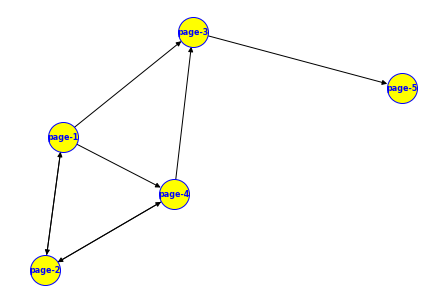

In [ ]:
Web.view_()

In [ ]:
print(Web.DropDeadEnds())

(        index    dest  probability
src                               
page-1      0  page-2          0.5
page-1      1  page-4          0.5
page-2      2  page-1          0.5
page-2      3  page-4          0.5
page-4      4  page-2          1.0, ['page-5', 'page-3'])


In [ ]:
Web.Taxation_(0.8)

,dest,V
0,page-1,0.238158
1,page-2,0.428509
2,page-4,0.333333


In [ ]:
Web.PageRank_()

,dest,V
0,page-1,0.238158
1,page-2,0.428509
3,page-3,0.246053
2,page-4,0.333333
4,page-5,0.246053


### VI. Test your solution: <b>case 3</b>

In [ ]:
# This code build the graph and the Web Matrix
Web = my_solution("Web")                                                #create the object WebMatrix
nodes = ["page-1","page-2","page-3","page-4","page-5","page-6"] 
Nnodes = Web.add_nodes_(nodes)                
Nedges = Web.add_edges_([("page-1","page-2"), ("page-1","page-3"),("page-1","page-4"), ("page-2","page-1"),("page-2","page-4"),("page-3","page-5"),("page-4","page-2"),("page-4","page-3"),("page-5","page-6")])
    
degree, DeadEnds = Web.find_DegreeOfNodes_()
df=Web.build_matrix_(degree)                         

print("Number of Nodes ", Nnodes)
print("Number of Edges ", Nedges)
print("degree per page ", Web.find_DegreeOfNodes_())
print("          Web Matrix ")
df

Number of Nodes  6
Number of Edges  9
degree per page  (array([3., 2., 1., 2., 1., 0.]), ['page-6'])
          Web Matrix 


,src,dest,probability
0,page-1,page-2,0.333333
1,page-1,page-3,0.333333
2,page-1,page-4,0.333333
3,page-2,page-1,0.500000
4,page-2,page-4,0.500000
5,page-3,page-5,1.000000
6,page-4,page-2,0.500000
7,page-4,page-3,0.500000
8,page-5,page-6,1.000000


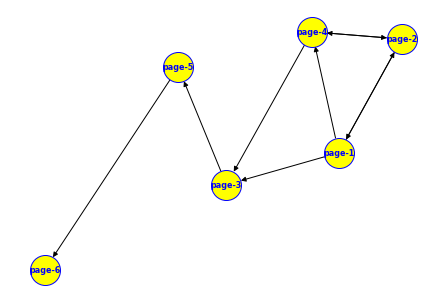

In [ ]:
Web.view_()

In [ ]:
print(Web.DropDeadEnds())

(        index    dest  probability
src                               
page-1      0  page-2          0.5
page-1      1  page-4          0.5
page-2      2  page-1          0.5
page-2      3  page-4          0.5
page-4      4  page-2          1.0, ['page-6', 'page-5', 'page-3'])


### VII. Submit your solution to the grader

In [ ]:
## TEACHER
student.submit_task(globals(), task_id="T1");

<font color='0B5345' ><b>Step 4:</b></font> A random surfer can decide to return to the previous page using the backwarding option. How should you modify the equation (3) to include this probability in the PageRank equation? 